Segmentation


In [35]:
import pandas as pd

In [36]:
df=pd.read_csv("Wholesale customers data.csv")

In [37]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [38]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [39]:
df.shape

(440, 8)

In [40]:
df.dtypes


Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

Training and Testing

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x=df

In [43]:
x_train, x_test, = train_test_split(x,test_size=0.3,random_state=5)

In [44]:
x_train.shape,x_test.shape

((308, 8), (132, 8))

Kmeans cluster

In [45]:
from sklearn.cluster import KMeans

In [46]:
km=KMeans(n_clusters=3,random_state=5)

In [47]:
km.fit(x_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=5)

In [48]:
km.cluster_centers_

array([[1.05555556e+00, 2.58333333e+00, 3.84246389e+04, 6.06922222e+03,
        6.15544444e+03, 8.75777778e+03, 8.54138889e+02, 3.88969444e+03],
       [1.28085106e+00, 2.56170213e+00, 8.50085532e+03, 3.95988936e+03,
        5.48829787e+03, 2.53625106e+03, 1.83987234e+03, 1.20304681e+03],
       [1.97297297e+00, 2.37837838e+00, 8.04972973e+03, 1.88483784e+04,
        2.66888108e+04, 1.93970270e+03, 1.13092432e+04, 2.19318919e+03]])

In [49]:


clust_nos=km.predict(x_test)

In [50]:
clust_nos

array([1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 0, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 0,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 2, 2, 0, 1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 0, 1, 0, 2, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1],
      dtype=int32)

In [51]:
len(clust_nos),x_test.shape

(132, (132, 8))

Decide K value


In [52]:
from sklearn.metrics import silhouette_score

In [53]:
silhouette_score(x_test,clust_nos,random_state=5)

0.4887070570048585

In [54]:
sc_list=[]
inertia_list=[]
for k in range (2,11):
  km=KMeans(k,random_state=5)
  km.fit(x_train)
  clust_nos=km.predict(x_test)
  inertia_list.append(km.inertia_)
  sc_list.append(silhouette_score(x_test,clust_nos))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

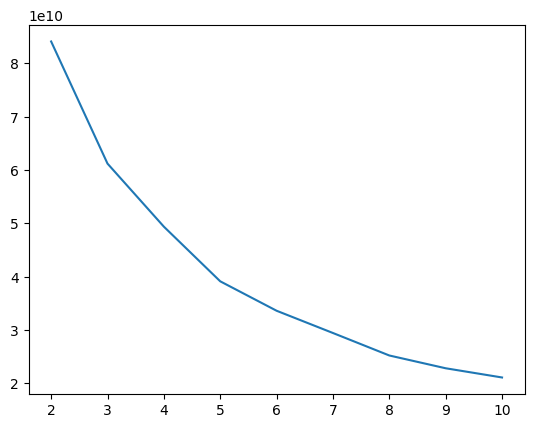

In [55]:
from matplotlib import pyplot as plt
plt.plot(range(2,11),inertia_list)

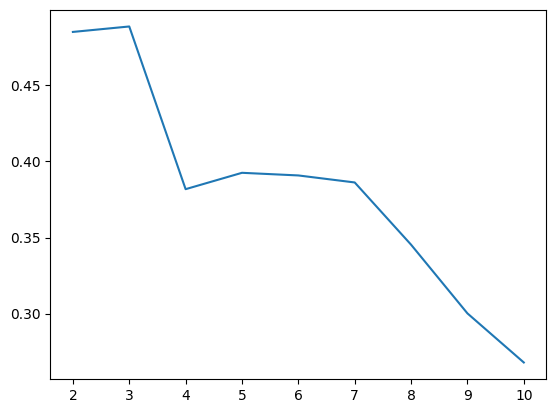

In [56]:
from matplotlib import pyplot as plt
plt.plot(range(2,11),sc_list)